# **Rank prediction using Ensemble Methods**

-- Aarsh Patel

# **Comparative Analysis of Baseline and best-fit XGBoost models.**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/imputed_data.csv")
print(df.columns)

Index(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL', 'Height',
       'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump',
       '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games', 'seasons',
       'tackles_solo', 'tackles_assists', 'tackles_total', 'tackles_loss',
       'sacks', 'def_int', 'def_int_yds', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'],
      dtype='object')


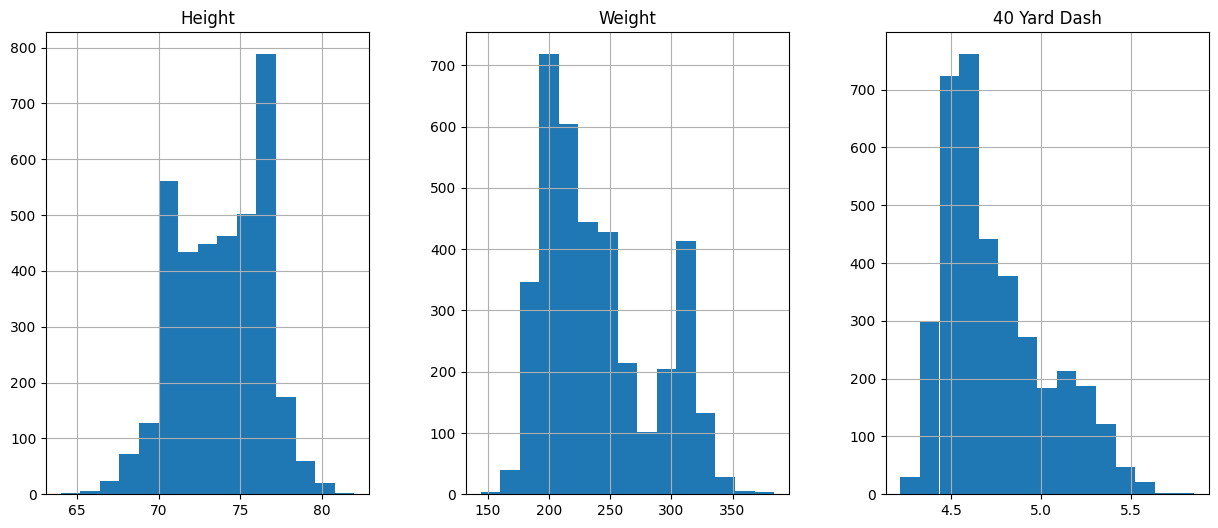

In [12]:


df[['Height', 'Weight', '40 Yard Dash']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()

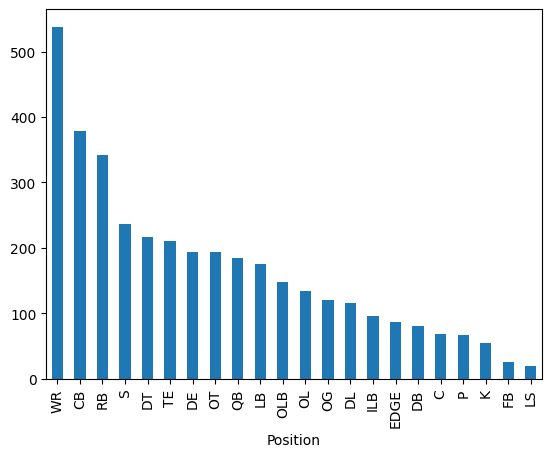

In [33]:
df['Position'].value_counts().plot(kind='bar')
plt.show()

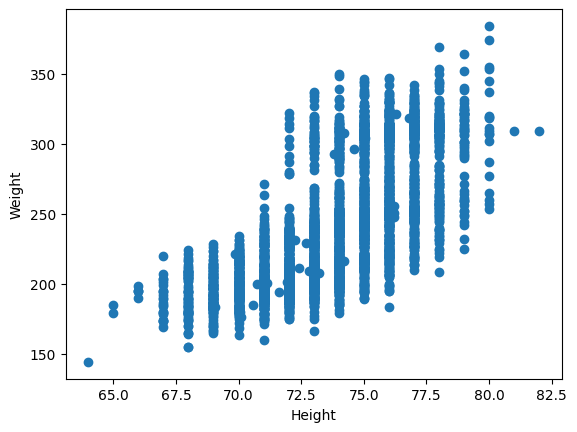

In [34]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

/var/folders/b2/gk83hhh92xd52bw9gsnpvk2r0000gn/T/ipykernel_70352/1833873945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby(['Position'])['40 Yard Dash'].median().sort_values(ascending=False)


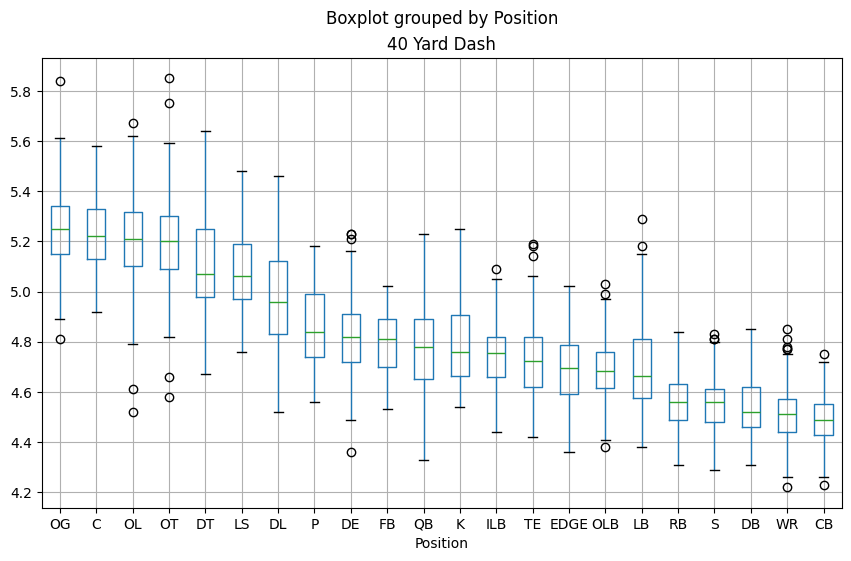

In [5]:
# Calculate the medians
medians = df.groupby(['Position'])['40 Yard Dash'].median().sort_values(ascending=False)

# Create a categorical type with the positions in the desired order
df['Position'] = pd.Categorical(df['Position'], categories=medians.index, ordered=True)

# Create the boxplot
df.sort_values(by='Position').boxplot(column='40 Yard Dash', by='Position', figsize=(10, 6))
plt.show()

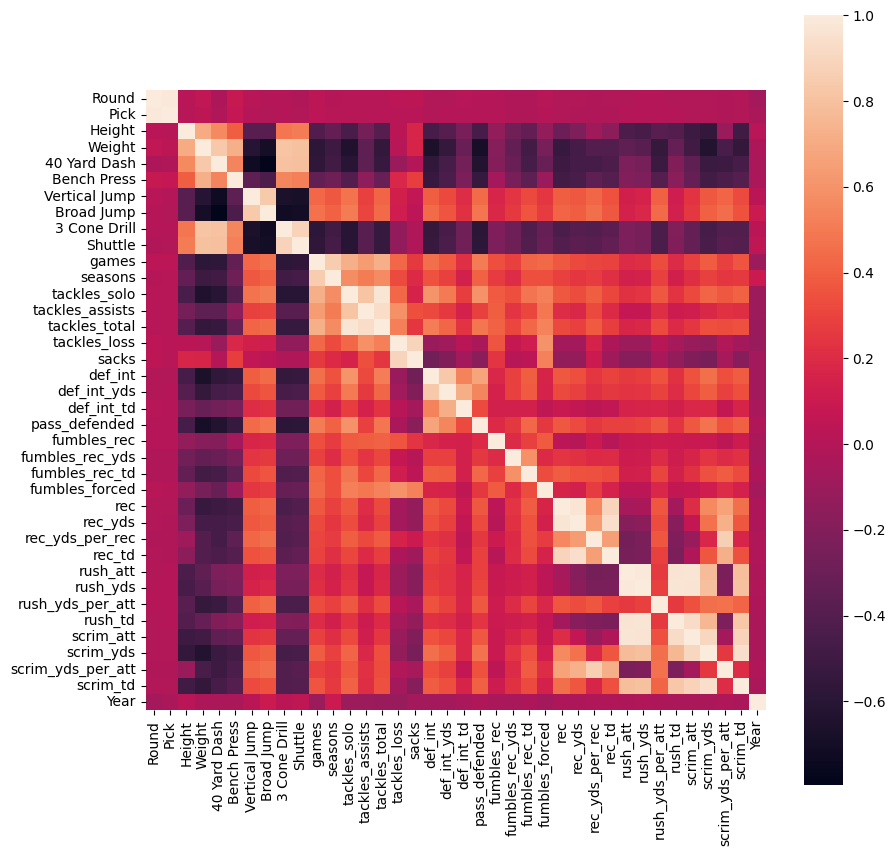

In [37]:
import seaborn as sns

corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

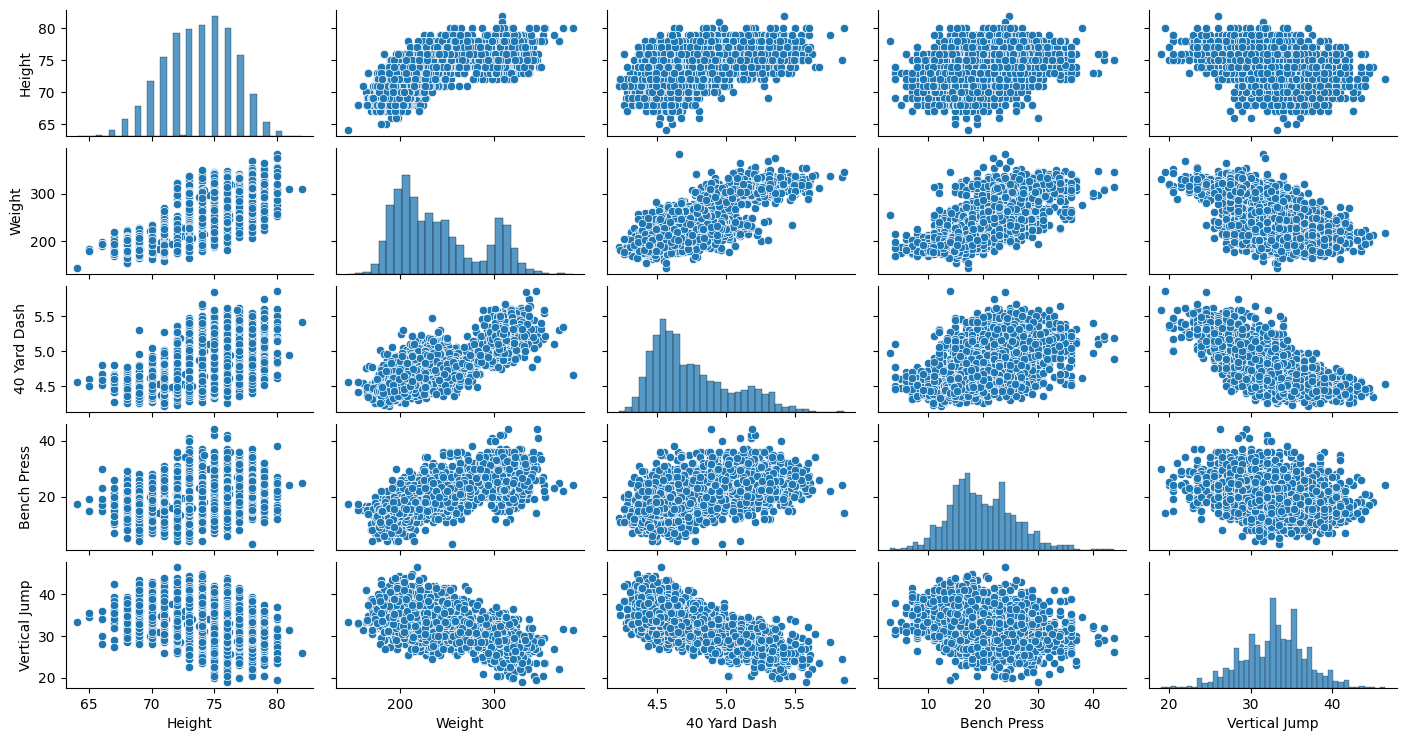

: 

In [23]:


# Select a subset of columns to consider
subset = df[['Height', 'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump']]
g = sns.pairplot(subset, height=1.5)

# Change the width of the entire figure
g.fig.set_figwidth(15)
plt.show()

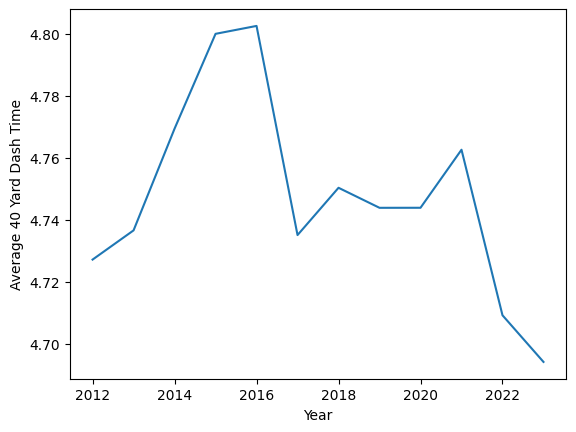

In [42]:
df.groupby('Year')['40 Yard Dash'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average 40 Yard Dash Time')
plt.show()

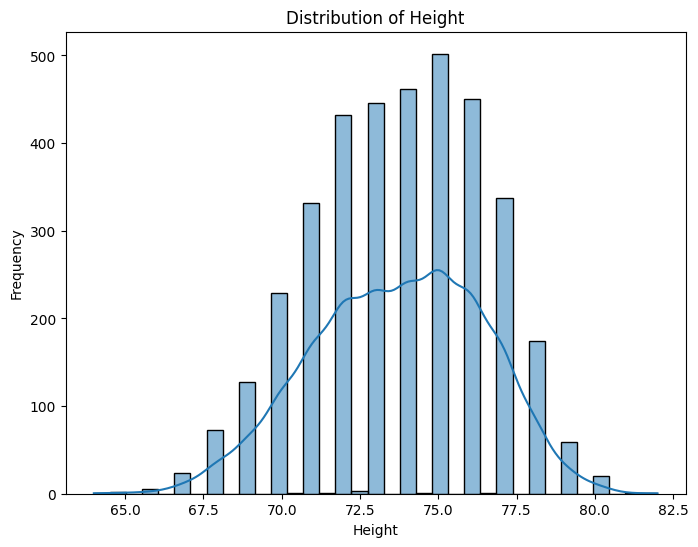

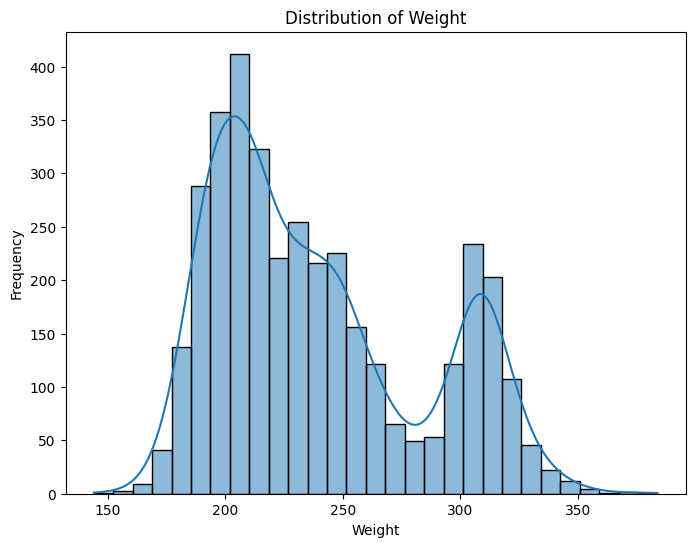

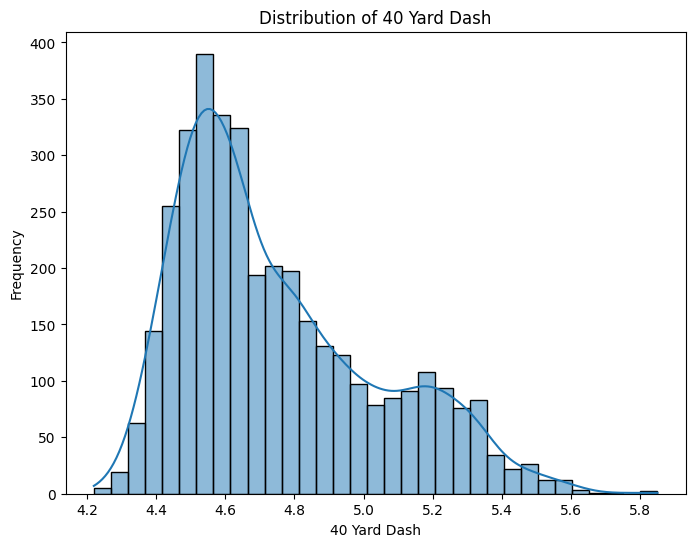

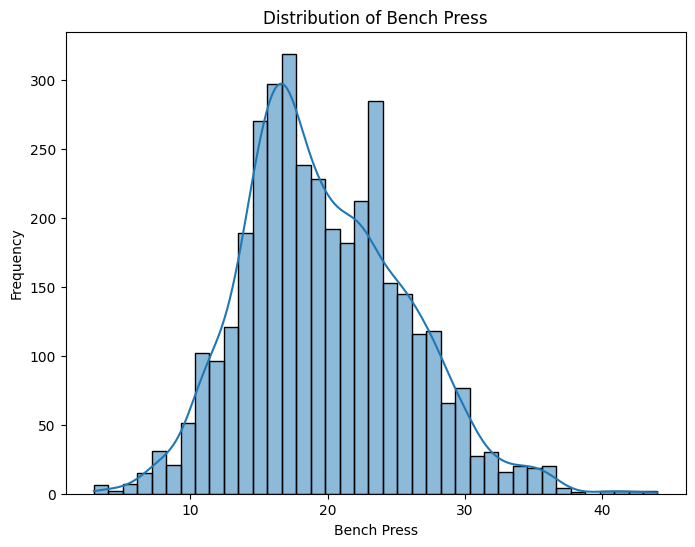

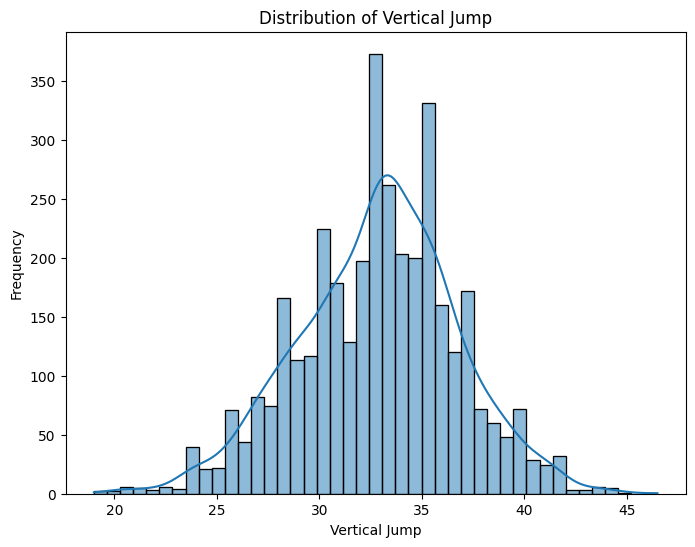

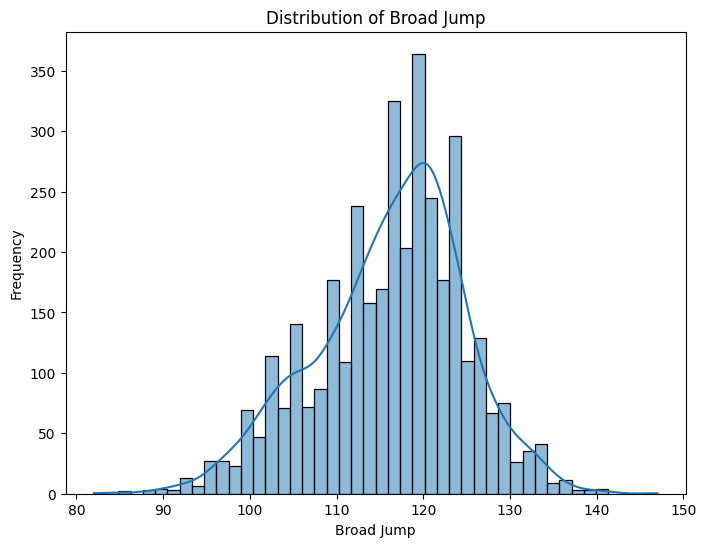

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features to visualize
numeric_features = ['Height', 'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump']

# Plotting distribution of numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [57]:
# College distribution
# plt.figure(figsize=(12, 8))
# sns.countplot(y='College', data=df, order=df['College'].value_counts().index[:15])
# plt.title('Top 15 Colleges with Most Players')
# plt.xlabel('Count')
# plt.ylabel('College')
# plt.show()
df['College'].value_counts()

College
Alabama                  127
LSU                      107
Georgia                  101
Florida                   94
Notre Dame                80
                        ... 
Northwestern St. (LA)      1
East. Michigan             1
Northern Arizona           1
Kent State                 1
Ball St.                   1
Name: count, Length: 163, dtype: int64

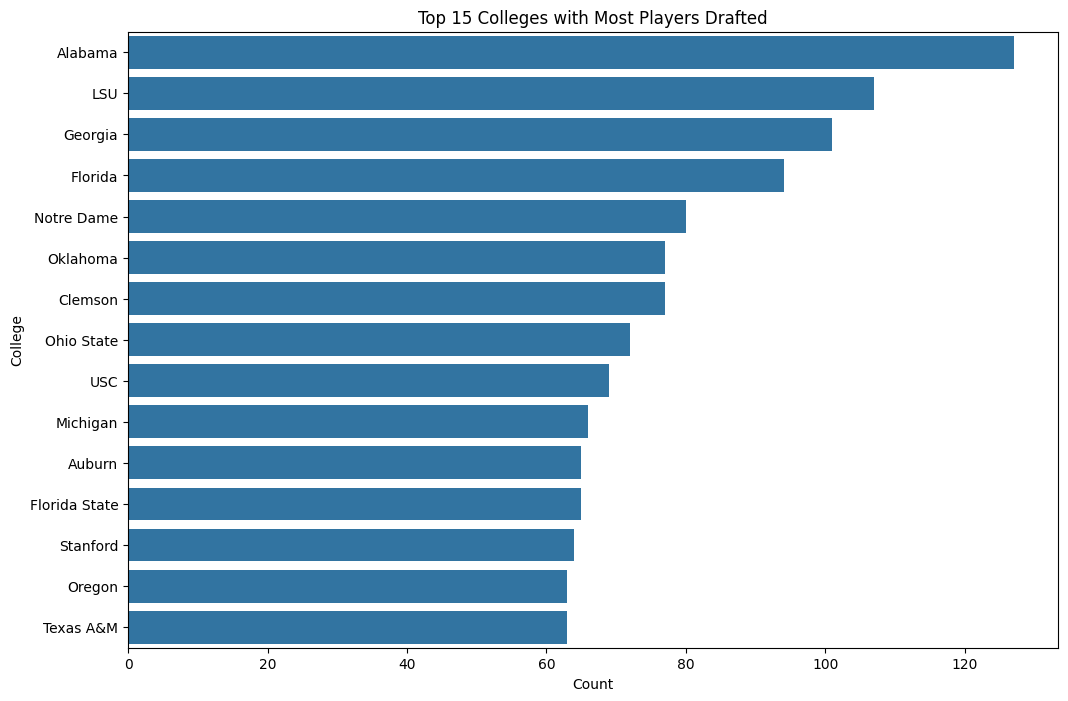

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by College and counting the number of players drafted from each college
college_counts = df['College'].value_counts().reset_index()
college_counts.columns = ['College', 'Count']

# Sorting colleges by the number of players drafted
college_counts = college_counts.sort_values(by='Count', ascending=False)
# Plotting the top 15 colleges with most players drafted
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='College', data=college_counts.head(15))
plt.title('Top 15 Colleges with Most Players Drafted')
plt.xlabel('Count')
plt.ylabel('College')
plt.show()


In [2]:
df.head()

,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


In [3]:
df.loc[df.Round != 1, "Round"] = 0

# Dropping the columns which donot contribute in prediction
all_X = df.drop(["Name", "Round", "Pick", "College"], axis=1)
all_X = pd.get_dummies(all_X)

# Splitting testing and training sets
train_X = all_X[(all_X.Year != 2023)].drop(["Year"], axis=1)
test_X = all_X[all_X.Year == 2023].drop(["Year"], axis=1)
train_y = df[(df.Year != 2023)].Round
test_y = df[df.Year == 2023].Round

In [16]:
train_X.head()

,Height,Weight,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3 Cone Drill,Shuttle,games,seasons,...,conf_abbr_CUSA,conf_abbr_Ind,conf_abbr_MAC,conf_abbr_MVC,conf_abbr_MWC,conf_abbr_Pac-10,conf_abbr_Pac-12,conf_abbr_SEC,conf_abbr_Sun Belt,conf_abbr_WAC
0,74.0,238.0,4.64,24.00,35.50,118.00,7.13,4.28,37.0,3.0,...,False,False,False,False,False,False,False,False,False,False
1,71.0,179.0,4.51,14.59,36.00,123.00,7.09,4.12,40.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2,76.0,296.0,5.31,19.00,25.50,99.00,7.74,4.62,34.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3,76.0,270.0,4.80,24.48,31.13,115.26,7.19,4.48,37.0,4.0,...,False,False,False,False,False,False,False,False,False,False
4,73.0,210.0,4.58,17.00,34.00,118.00,7.02,4.25,42.0,4.0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
test_X.head()

,Height,Weight,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3 Cone Drill,Shuttle,games,seasons,...,conf_abbr_CUSA,conf_abbr_Ind,conf_abbr_MAC,conf_abbr_MVC,conf_abbr_MWC,conf_abbr_Pac-10,conf_abbr_Pac-12,conf_abbr_SEC,conf_abbr_Sun Belt,conf_abbr_WAC
3400,70.0,216.0,4.51,19.42,33.64,115.58,7.03,4.28,31.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3401,73.0,237.0,4.47,17.09,36.50,129.00,7.22,4.25,53.0,5.0,...,False,False,False,False,False,False,False,False,False,False
3402,69.0,188.0,4.32,14.92,33.00,119.26,7.02,4.19,30.0,3.0,...,False,False,False,False,False,False,False,True,False,False
3403,71.0,173.0,4.49,15.14,34.00,122.00,7.00,4.16,35.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3404,74.0,282.0,4.49,27.00,37.50,125.00,7.22,4.47,36.0,4.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = { 
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=100000, penalty='l2', n_jobs=7), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Get the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

/Users/aarshpatel/Downloads/Intro to DS/Project/Predict_the_NFL_cut/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aarshpatel/Downloads/Intro to DS/Project/Predict_the_NFL_cut/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

Best Parameters:  {'C': 100, 'solver': 'newton-cholesky'}
Best Score:  0.8929411764705882


In [20]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=100000, penalty='l2', n_jobs=-1)

log_reg.fit(train_X, train_y)

/Users/aarshpatel/Downloads/Intro to DS/Project/Predict_the_NFL_cut/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=100000, n_jobs=-1)

In [21]:
from sklearn.metrics import accuracy_score
# Predict on the testing data
predictions = log_reg.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(test_y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8274647887323944


In [27]:
# Predicting the probabilities of Test set
baseline_preds = log_reg.predict_proba(test_X)
count = 1

# Ranking done according to the probability scores
for i in pd.DataFrame(baseline_preds).sort_values(by=1, ascending=False).index:
    print(str(count) + " " + str(df[df.Year==2023].reset_index().at[i, "Name"]))
    count += 1

1 Anthony Richardson
2 Dawand Jones
3 Blake Freeland
4 DJ Turner
5 Darnell Wright
6 Tyler Steen
7 Kelee Ringo
8 Will Anderson Jr.
9 Jakorian Bennett
10 Byron Young
11 Adetomiwa Adebawore
12 Broderick Jones
13 Emmanuel Forbes
14 Anthony Bradford
15 Jon Gaines
16 Gervon Dexter
17 Anton Harrison
18 Quentin Johnston
19 Richard Gouraige
20 Calijah Kancey
21 Cam Smith
22 Christian Gonzalez
23 Julius Brents
24 Tanner McKee
25 Bryan Bresee
26 YaYa Diaby
27 Yasir Abdullah
28 Darnell Washington
29 Malaesala Aumavae-Laulu
30 Asim Richards
31 Lukas Van Ness
32 Jonathan Mingo
33 Deonte Banks
34 Dalton Wagner
35 John Ojukwu
36 Wanya Morris
37 Isaiah Foskey
38 Matthew Bergeron
39 Peter Skoronski
40 Marvin Mims
41 A.T. Perry
42 Isaiah McGuire
43 Joe Tippmann
44 Carrington Valentine
45 Nolan Smith
46 Owen Pappoe
47 Jalen Carter
48 Clayton Tune
49 Dorian Thompson-Robinson
50 Jalen Redmond
51 Cory Trice
52 Bijan Robinson
53 C.J. Stroud
54 Brian Branch
55 Will Levis
56 Darius Rush
57 Stetson Bennett
58 Br

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Convert predicted probabilities to binary predictions based on a threshold (e.g., 0.5)
predicted_labels = (baseline_preds[:, 1] > 0.5).astype(int)

# Evaluation for ranking metrics
# Sort the predictions based on probability scores
sorted_indices = np.argsort(-baseline_preds[:, 1])
k = 10
num_relevant = sum(test_y)

def calculate_MRR(sorted_indices, test_y):
    # Calculate Mean Reciprocal Rank (MRR)
    mrr = 0
    for idx, i in enumerate(sorted_indices):
        if test_y.iloc[i] == 1:  # Use iloc to access test_y by index
            mrr = 1 / (idx + 1)
            break
    return mrr

def calculate_MAP(sorted_indices, test_y):
    # Calculate Mean Average Precision (MAP)
    ap = 0
    for idx, i in enumerate(sorted_indices):
        if test_y.iloc[i] == 1:
            ap += sum(test_y.iloc[:idx + 1]) / (idx + 1)
    map_score = ap / num_relevant
    return map_score

def calculate_NDCG(sorted_indices, test_y):
    # Calculate Normalized Discounted Cumulative Gain (NDCG) at k=10
    dcg = 0
    idcg = sum(1 / np.log2(np.arange(2, k + 2)))
    for idx, i in enumerate(sorted_indices[:k]):
        if test_y.iloc[i] == 1:
            dcg += 1 / np.log2(idx + 2)
    ndcg = dcg / idcg
    return ndcg

def calculate_PAK(sorted_indices, test_y):
    # Calculate Precision at k (P@k)
    tp_at_k = sum(test_y.iloc[sorted_indices[:k]])
    precision_at_k = tp_at_k / k
    return precision_at_k

def calculate_RAK(sorted_indices, test_y):
    # Calculate Recall at k (R@k)
    tp_at_k = sum(test_y.iloc[sorted_indices[:k]])
    recall_at_k = tp_at_k / num_relevant
    return recall_at_k

In [29]:
from tabulate import tabulate

# Calculate all measurements
baseline_measurements = [
    ("Accuracy", accuracy_score(test_y, predicted_labels)),
    ("ROC AUC Score", roc_auc_score(test_y, baseline_preds[:, 1])),
    ("Mean Reciprocal Rank (MRR)", calculate_MRR(sorted_indices, test_y)),
    ("Mean Average Precision (MAP)", calculate_MAP(sorted_indices, test_y)),
    ("Normalized Discounted Cumulative Gain (NDCG) at k=10", calculate_NDCG(sorted_indices, test_y)),
    ("Precision at k (P@k) at k=10", calculate_PAK(sorted_indices, test_y)),
    ("Recall at k (R@k) at k=10", calculate_RAK(sorted_indices, test_y))
]

# Print measurements in a table format
print("Baseline measurements")
print(tabulate(baseline_measurements, headers=["Metric", "Value"]))

Baseline measurements
Metric                                                   Value
----------------------------------------------------  --------
Accuracy                                              0.827465
ROC AUC Score                                         0.755375
Mean Reciprocal Rank (MRR)                            1
Mean Average Precision (MAP)                          0.11794
Normalized Discounted Cumulative Gain (NDCG) at k=10  0.374666
Precision at k (P@k) at k=10                          0.3
Recall at k (R@k) at k=10                             0.103448
